Predicting Customer Churn in a Telecommunications Company

Data Collection and Preprocessing

In [1]:
#--Importing libraries 
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import sklearn

In [2]:
#loading the data
data=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Downloads\SpeakX\WA_Fn-UseC_-Telco-Customer-Churn.csv',encoding='unicode_escape')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.shape

(7043, 21)

In [6]:
data.size

147903

In [7]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Some column have incorrect data types
we have to convert it 
-- Here TotalCharges shlud of float datatype 

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [9]:
# checking duplicay
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [10]:
#checking null values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Replacing the null values with stastitcal methods
#data['TotalCharges'].fillna(data['TotalCharges'].mean(),inplace=True)
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [15]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

-----EDA

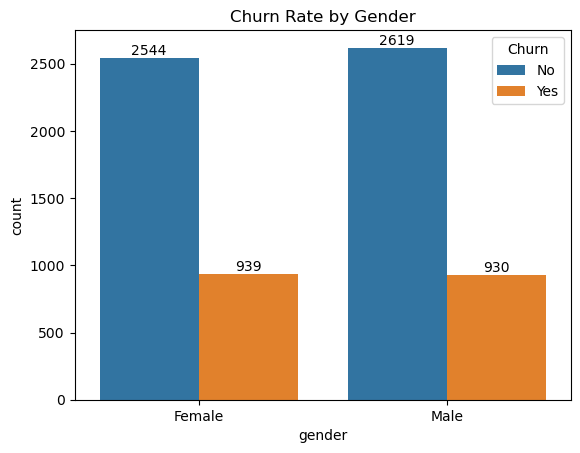

In [16]:
ax=sns.countplot(data=data,x = 'gender', hue='Churn')
plt.title('Churn Rate by Gender')
for bars in ax.containers:
    ax.bar_label(bars)

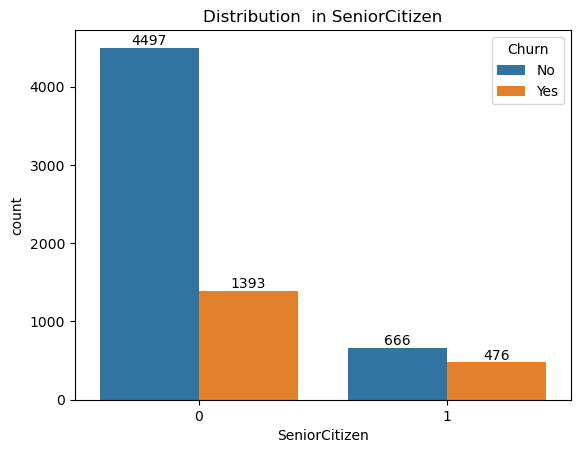

In [17]:
ax=sns.countplot(data=data,x = 'SeniorCitizen', hue='Churn') 
plt.title('Distribution  in SeniorCitizen')
for bars in ax.containers:
    ax.bar_label(bars)

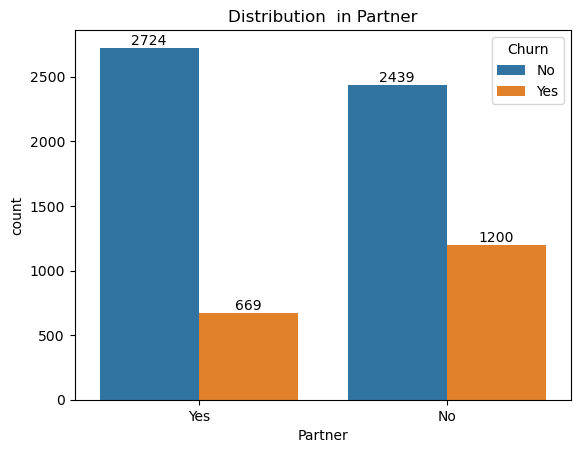

In [18]:
ax=sns.countplot(data=data,x = 'Partner', hue='Churn') 
plt.title('Distribution  in Partner')
for bars in ax.containers:
    ax.bar_label(bars)

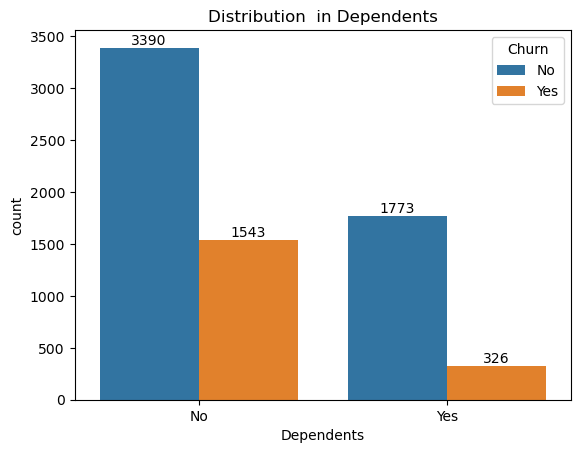

In [19]:
ax=sns.countplot(data=data,x = 'Dependents', hue='Churn') 
plt.title('Distribution  in Dependents')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 1.0, 'Distribution  in tenure')

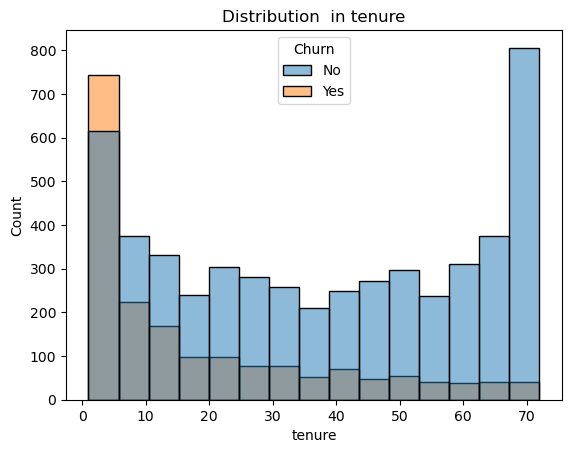

In [20]:
ax=sns.histplot(data=data,x = 'tenure', hue='Churn') 
plt.title('Distribution  in tenure')


In [21]:
data['tenure'].max()

72

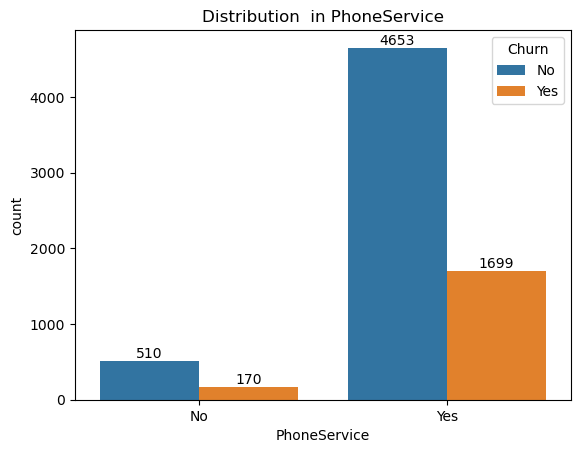

In [22]:
ax=sns.countplot(data=data,x = 'PhoneService', hue='Churn') 
plt.title('Distribution  in PhoneService')
for bars in ax.containers:
    ax.bar_label(bars)

Text(0.5, 0, 'Internet Service Type')

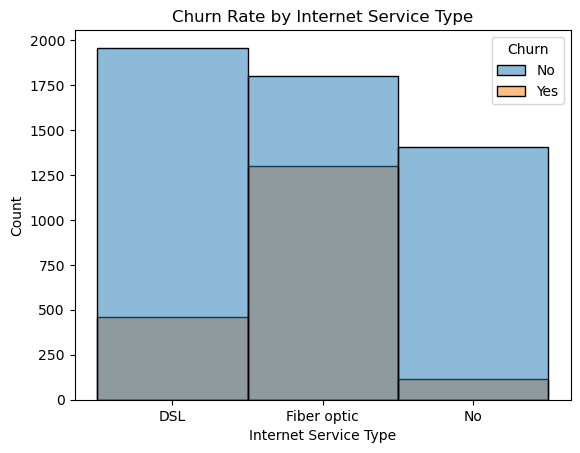

In [23]:
sns.histplot(data=data,x = 'InternetService', hue='Churn') 
plt.title('Churn Rate by Internet Service Type')
plt.xlabel('Internet Service Type')

Text(0.5, 1.0, 'Distribution  in TechSupport')

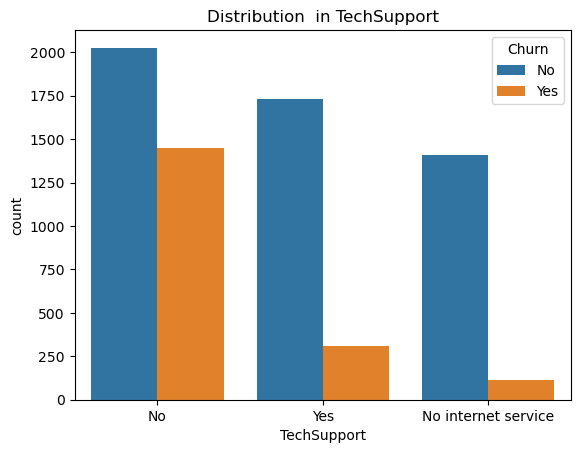

In [24]:
ax=sns.countplot(data=data,x = 'TechSupport', hue='Churn') 
plt.title('Distribution  in TechSupport')



Text(0.5, 0, 'Contract Type')

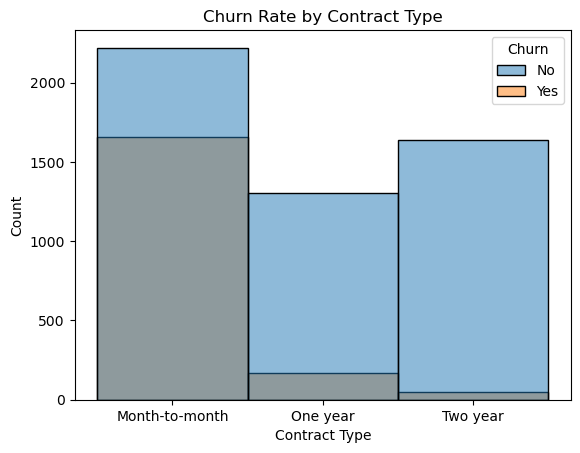

In [25]:
sns.histplot(data=data,x = 'Contract', hue='Churn') 
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')

Text(0.5, 1.0, 'Distribution  in PaperlessBilling')

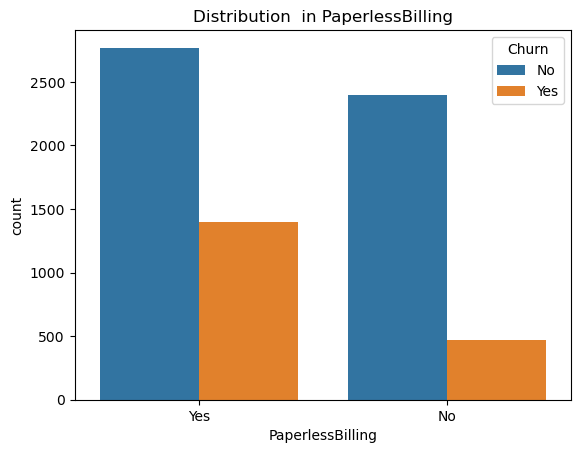

In [26]:
ax=sns.countplot(data=data,x = 'PaperlessBilling', hue='Churn') 
plt.title('Distribution  in PaperlessBilling')



Text(0.5, 1.0, 'Distribution  in PaymentMethod')

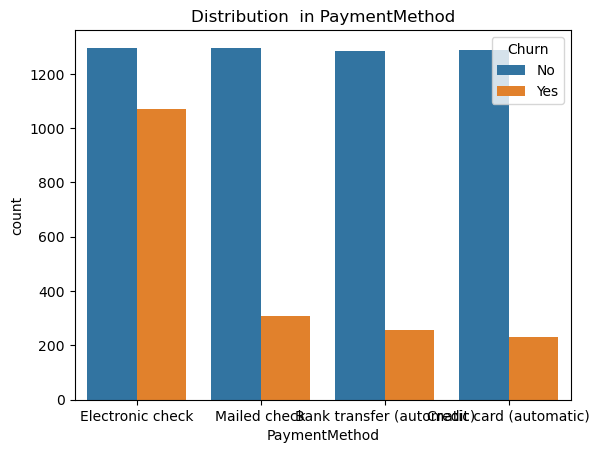

In [27]:
ax=sns.countplot(data=data,x = 'PaymentMethod', hue='Churn') 
plt.title('Distribution  in PaymentMethod')



Text(0, 0.5, 'Monthly Charges')

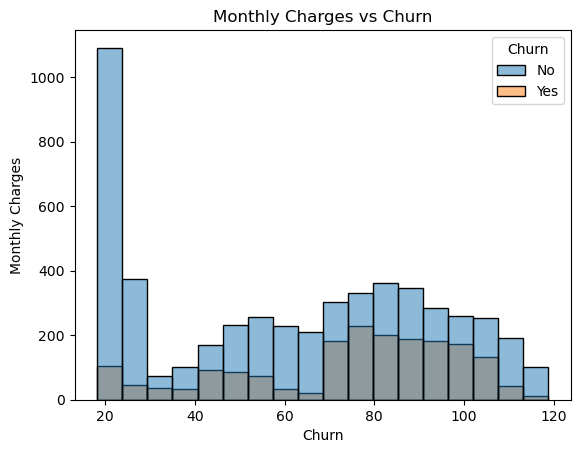

In [28]:
sns.histplot(data=data,x = 'MonthlyCharges', hue='Churn') 
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

All th above are some graphs and chart that show the distribution of churn in various categories 

------ Transforming data 

Label Encoding: converting the labels into numeric form

In [29]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode binary categorical variables
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for column in binary_columns:
    data[column] = le.fit_transform(data[column])



In [31]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,0,1,22,1,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,0,0,10,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,1,0,28,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,No,DSL,Yes,...,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [32]:
# One-hot encode multi-class categorical variables
data = pd.get_dummies(data, columns=['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], drop_first=True)


In [33]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,1,29.85,29.85,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,0,56.95,1889.50,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,Male,0,0,0,2,1,1,53.85,108.15,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,Male,0,0,0,45,0,0,42.30,1840.75,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,Female,0,0,0,2,1,1,70.70,151.65,...,0,0,0,0,0,0,0,0,0,0
5,9305-CDSKC,Female,0,0,0,8,1,1,99.65,820.50,...,0,0,0,1,0,0,0,1,0,1
6,1452-KIOVK,Male,0,0,1,22,1,1,89.10,1949.40,...,0,1,0,0,0,0,0,1,0,0
7,6713-OKOMC,Female,0,0,0,10,0,0,29.75,301.90,...,0,0,0,0,0,0,0,0,0,0
8,7892-POOKP,Female,0,1,0,28,1,1,104.80,3046.05,...,0,0,0,1,0,1,0,1,0,1
9,6388-TABGU,Male,0,0,1,62,1,0,56.15,3487.95,...,0,1,0,0,0,0,0,0,0,0


In [34]:
# Drop the 'customerID' column
data.drop(columns=['customerID'], inplace=True)

In [35]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,0,0,0,0,0,0
1,Male,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,0,0,0
2,Male,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,0,0,0,0,0,0
3,Male,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,1,0,0,0,0
4,Female,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
import numpy as np
print(data['gender'].value_counts())
data['gender'] = np.where(data.gender== 'Female',1,0)
print(data.head)

Male      3549
Female    3483
Name: gender, dtype: int64
<bound method NDFrame.head of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      PaperlessBilling  

In [37]:
data['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,0,0,1,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
churn_column = data.pop('Churn')  
data['Churn'] = churn_column 

In [40]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,...,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Churn
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,34,1,0,56.95,1889.50,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,2,1,1,53.85,108.15,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,1,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
data.to_csv('telco-Customer-Churn.csv')